# CS4055 Project

14161044 - Oliver Gavin

14117495 - Jonathan Lloyd

13148583 - James Conroy

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', None)

## Dataset Description
(5 marks) Describe the meaning of all attributes in your dataset and cite the source of the dataset.

Source: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

Attribute Information:

    1) ID number
    2) Diagnosis (M = malignant, B = benign)
    3-32) Ten real-valued features are computed for each cell nucleus:

        a) radius (mean of distances from center to points on the perimeter)
        b) texture (standard deviation of gray-scale values)
        c) perimeter
        d) area
        e) smoothness (local variation in radius lengths)
        f) compactness (perimeter^2 / area - 1.0)
        g) concavity (severity of concave portions of the contour)
        h) concave points (number of concave portions of the contour)
        i) symmetry
        j) fractal dimension ("coastline approximation" - 1)
        
The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

In [2]:
raw_data = pd.read_csv('breast-cancer/data.csv')


In [3]:
# Some raw data
raw_data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


## 1. Dataset Preperation
(5 marks)
Pick a dataset with at least 200 data rows and prepare it for data mining. This may include one or more of
the following:

    a. Clean the data: remove outliers, remove corrupt or incorrect data rows, etc.
    b. Discretize some numeric attributes, i.e. transform them to nominal.
    c. Select features (i.e. attributes).

### Cleaning the data
The data shown above suffers from a slight problem; a column 'Unamed: 32' is introduced because the source data contains a trailing delimiter. This can be firstly removed, along with the 'id' column.

In [4]:
clean_data = raw_data.drop(['id', 'Unnamed: 32'], axis=1)

### Discretizing some numeric attributes
The diagnosis is binary, either malignant or benign, so this attribute can be converted to numeric values

In [5]:
BENIGN = 0
MALIGNANT = 1
clean_data['diagnosis'] = clean_data['diagnosis'].map({'B':BENIGN,'M':MALIGNANT})


Other attributes?

### Preliminary Insights & Visualisations
Bar chart for diagnosis, bar chart separated classes for rest -> logistic regression?, plot against in scatter?

In [6]:
class_distribution = clean_data['diagnosis'].value_counts()

print('Benign: ', class_distribution[BENIGN])
print('Malignant: ', class_distribution[MALIGNANT])

Benign:  357
Malignant:  212


#### Distribution and Pairwise Relationships
The matrix below gives us two key insights useful for selecting possibly good attributes. It models only the 'mean' values in the dataset, but similar observations can be seen for 'worst' values. However 'se' (standard error) values show less interesting results.

The diagonal shows the distribution of a single attribute for both classes.

The other plots show scatter plots for each pair of attributes.

This visualisation can help for initial ideas on how this dataset may be classified.

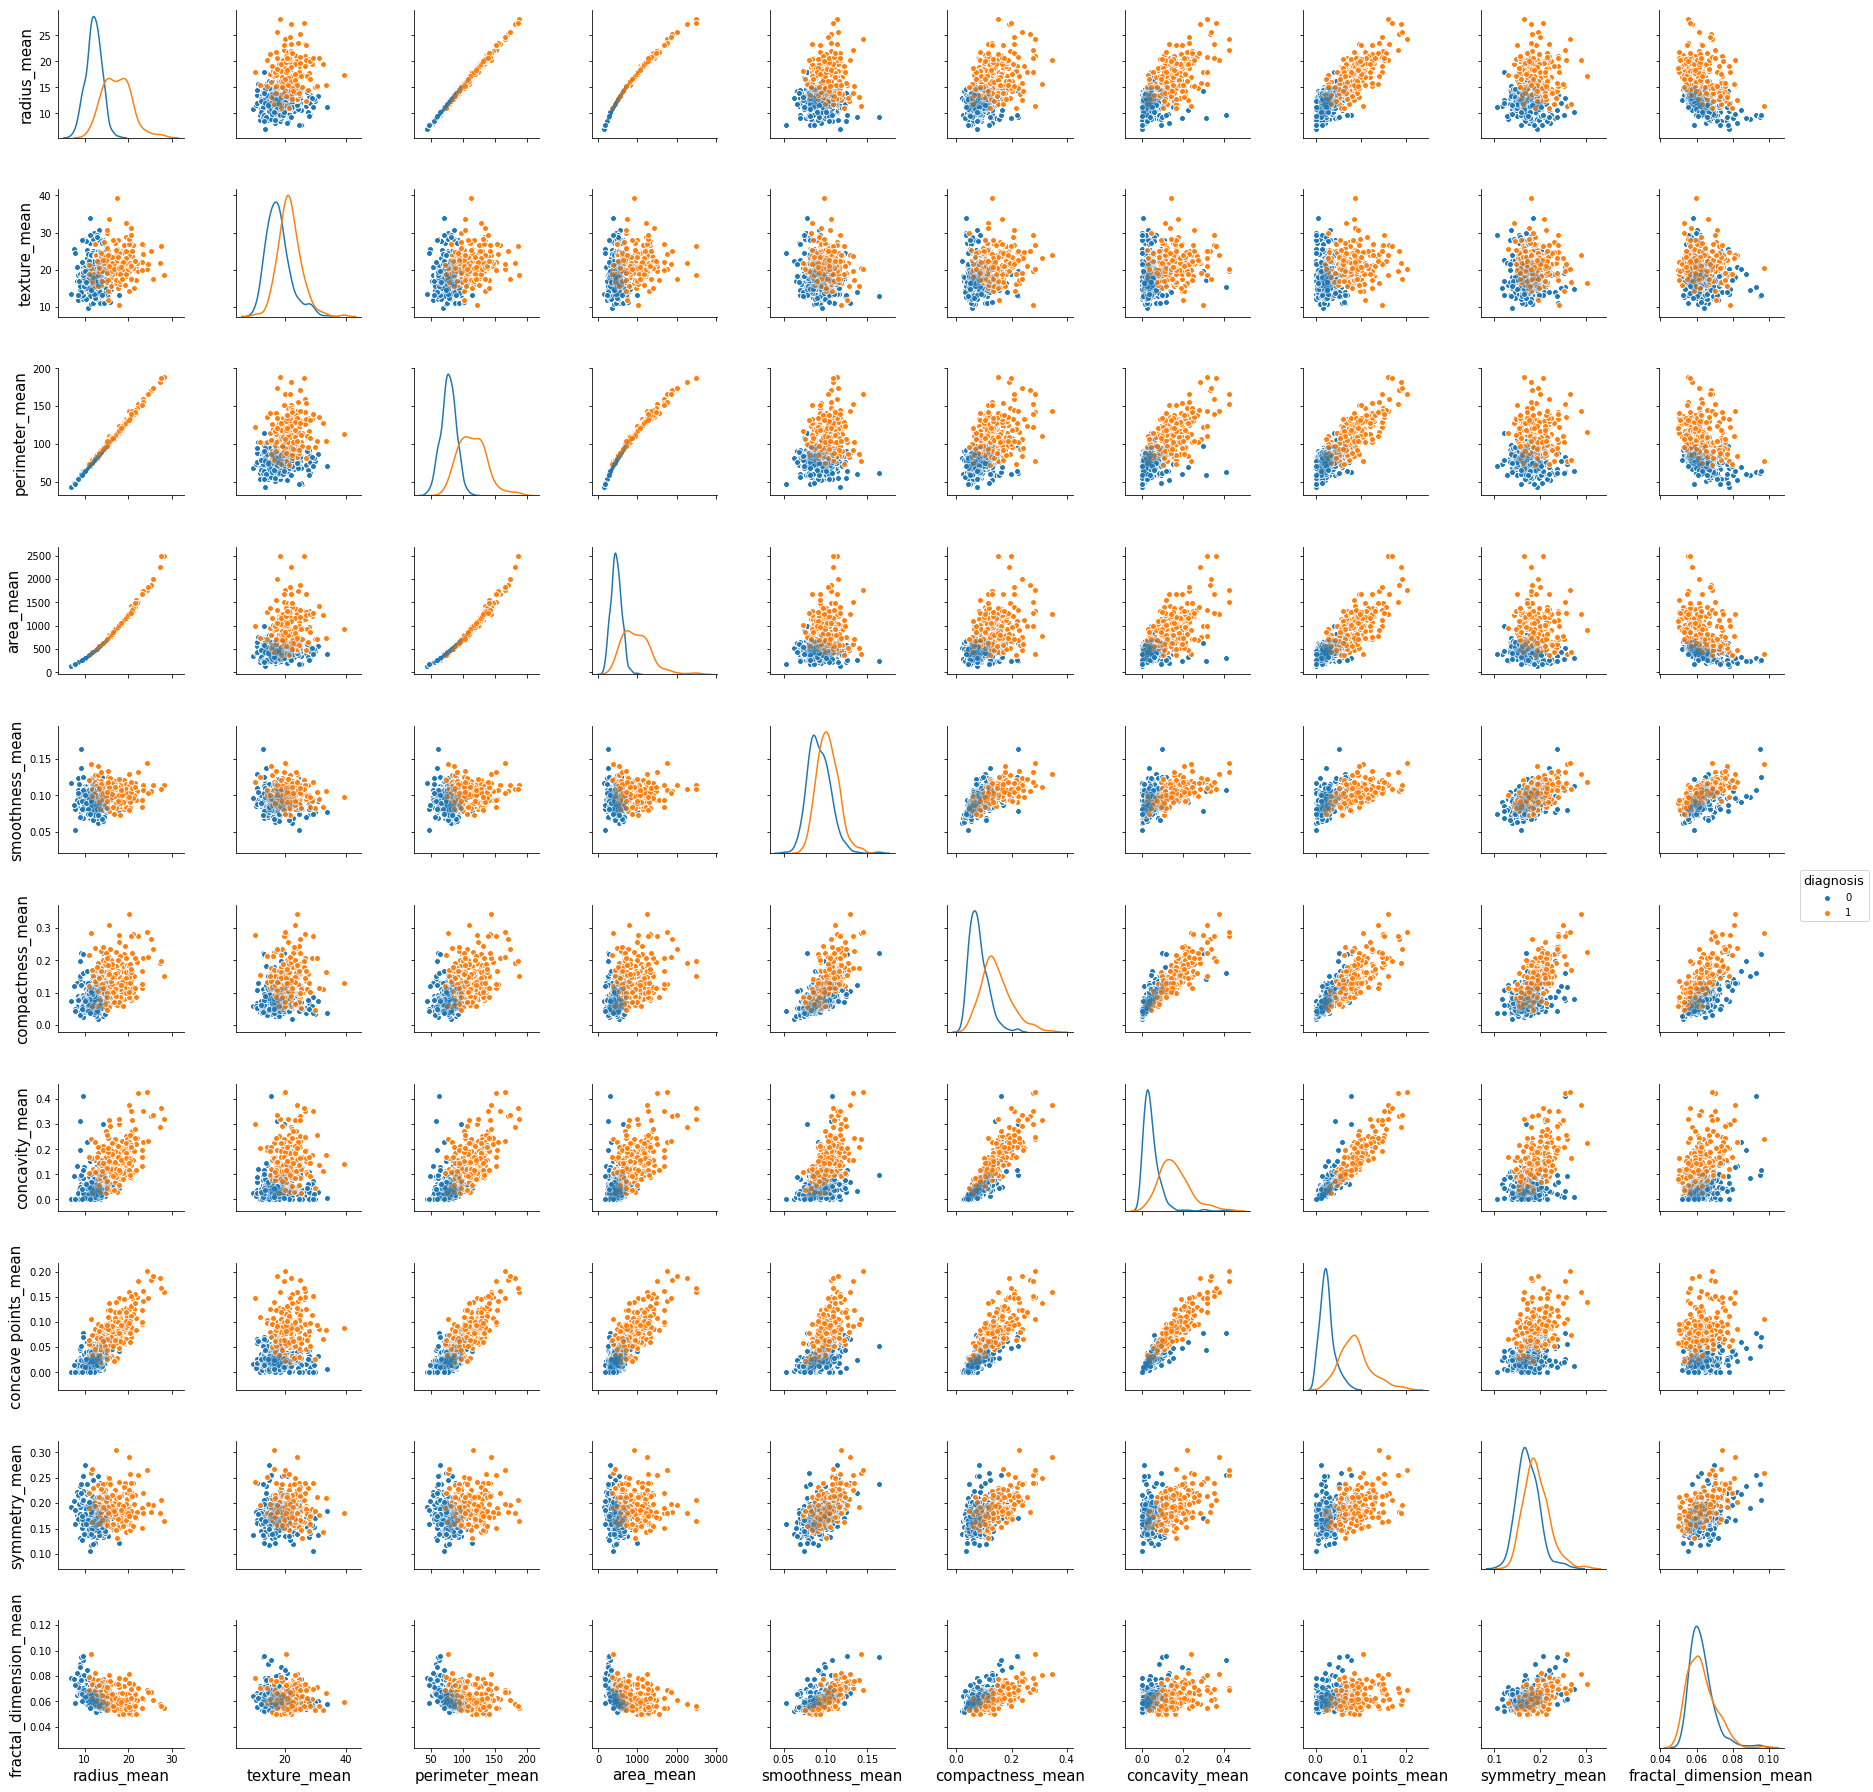

In [7]:
mean_labels = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'
]
se_labels = ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']
worst_labels = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

plt.rcParams["axes.labelsize"] = 15

g = sns.pairplot(clean_data, vars=mean_labels, hue='diagnosis', diag_kind="kde")
g = g.map_offdiag(plt.scatter, s=5, alpha=0.1)

### Selected attributes
The 'mean' attributes seem appropriate for initial explorations.

Interesting single attributes based on distribution (suitable for OneR, logistic regression):

    1) concave points_mean
    2) concavity_mean
    3) radius_mean
    4) perimeter_mean
    5) compactness_mean
    
Other interesting combinations of attributes may be used for better insights (SVN, naive bayes, k-means).

Since we are using an automated approach, there is little need to select any features, however it is useful to note the ones we expect to be valuable.

## 2. Predictive Analytics
(30 marks)

• Pick either a nominal class attribute or a numeric attribute and apply a few different data mining
algorithms for building classification and/or numeric prediction models. Tune algorithm parameters and
evaluate the models by following the data mining workflow guidelines in Lecture 9.

• Apply at least one algorithm that has not been covered in class (for example, some of the algorithms in
chapter 6 of Witten, Frank and Hall’s book “Data Mining (Practical Machine Learning Tools and
Techniques)”.

## 3. Descriptive Analytics
(20 marks)

• Discover a meaningful clustering of your dataset. Try k-Means and at least one clustering algorithm that
has not been covered in class.

• Create an insightful visualisation of your dataset.

## Conclusion
(30 marks)

Draw conclusions from your experiments. What did you discover in the data? Are your
discoveries implicit, previously unknown and potentially useful information? Why? Negative results, i.e.
nothing interesting discovered, are acceptable as long as you have shown that you have tried a variety of
algorithms and followed the workflow.